In [2]:
#importting library
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the Shape of Iris Dataset

dataset.shape

(150, 6)

In [4]:
#This include the count , mean , the min and max values as well as some percentiles
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#check null values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
X = dataset.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = dataset['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
#spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
#importing the library and fiting the X_train and y_train into Algorithm
from sklearn.tree import DecisionTreeClassifier
Dclassifier = DecisionTreeClassifier().fit(X_train, y_train)

In [11]:
y_pred = Dclassifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [12]:
#Checking the Accuracy y_test vs y_pred
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

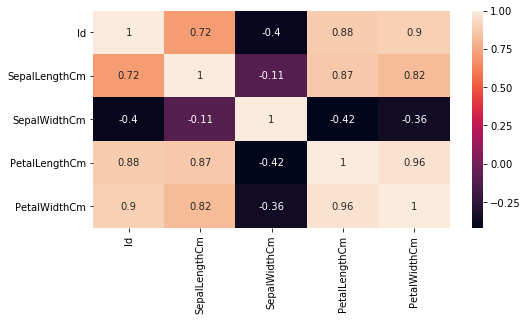

In [13]:
#using Pearson's correlation for quantifying the relationship
plt.figure(figsize=(8,4))
import seaborn as sns
corr = dataset.corr(method='pearson')
sns.heatmap(corr, annot=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


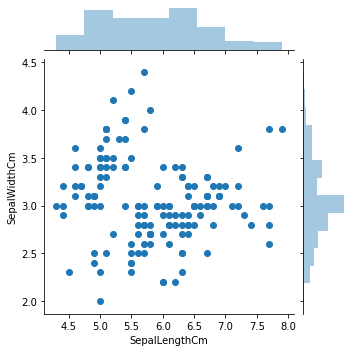

In [14]:
#Here we are using jointplot of seaborn lib to plot iris data
sns.jointplot(x = "SepalLengthCm", y = "SepalWidthCm", data=dataset, size=5)

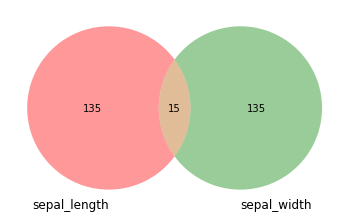

In [22]:
from matplotlib_venn import venn2 
import matplotlib_venn as venn
sepal = dataset.iloc[:,0]
sepalwd = dataset.iloc[:,1]
petal = dataset.iloc[:,2]
petalwd = dataset.iloc[:,3]

venn2(subsets = (len(sepal) - 15, len(sepalwd) -15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

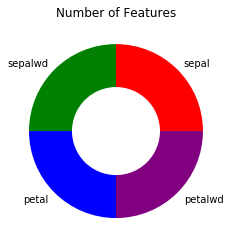

In [23]:
feature_names = 'sepal', 'sepalwd', 'petal', 'petalwd'
feature_sizes = [len(sepal),len(sepalwd),len(petal), len(petalwd)]
circle = plt.Circle((0,0),0.5, color = 'white')    ##coordinate,radius
plt.pie(feature_sizes, labels = feature_names, colors = ['red', 'green', 'blue', 'purple'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Number of Features')
plt.show()

In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


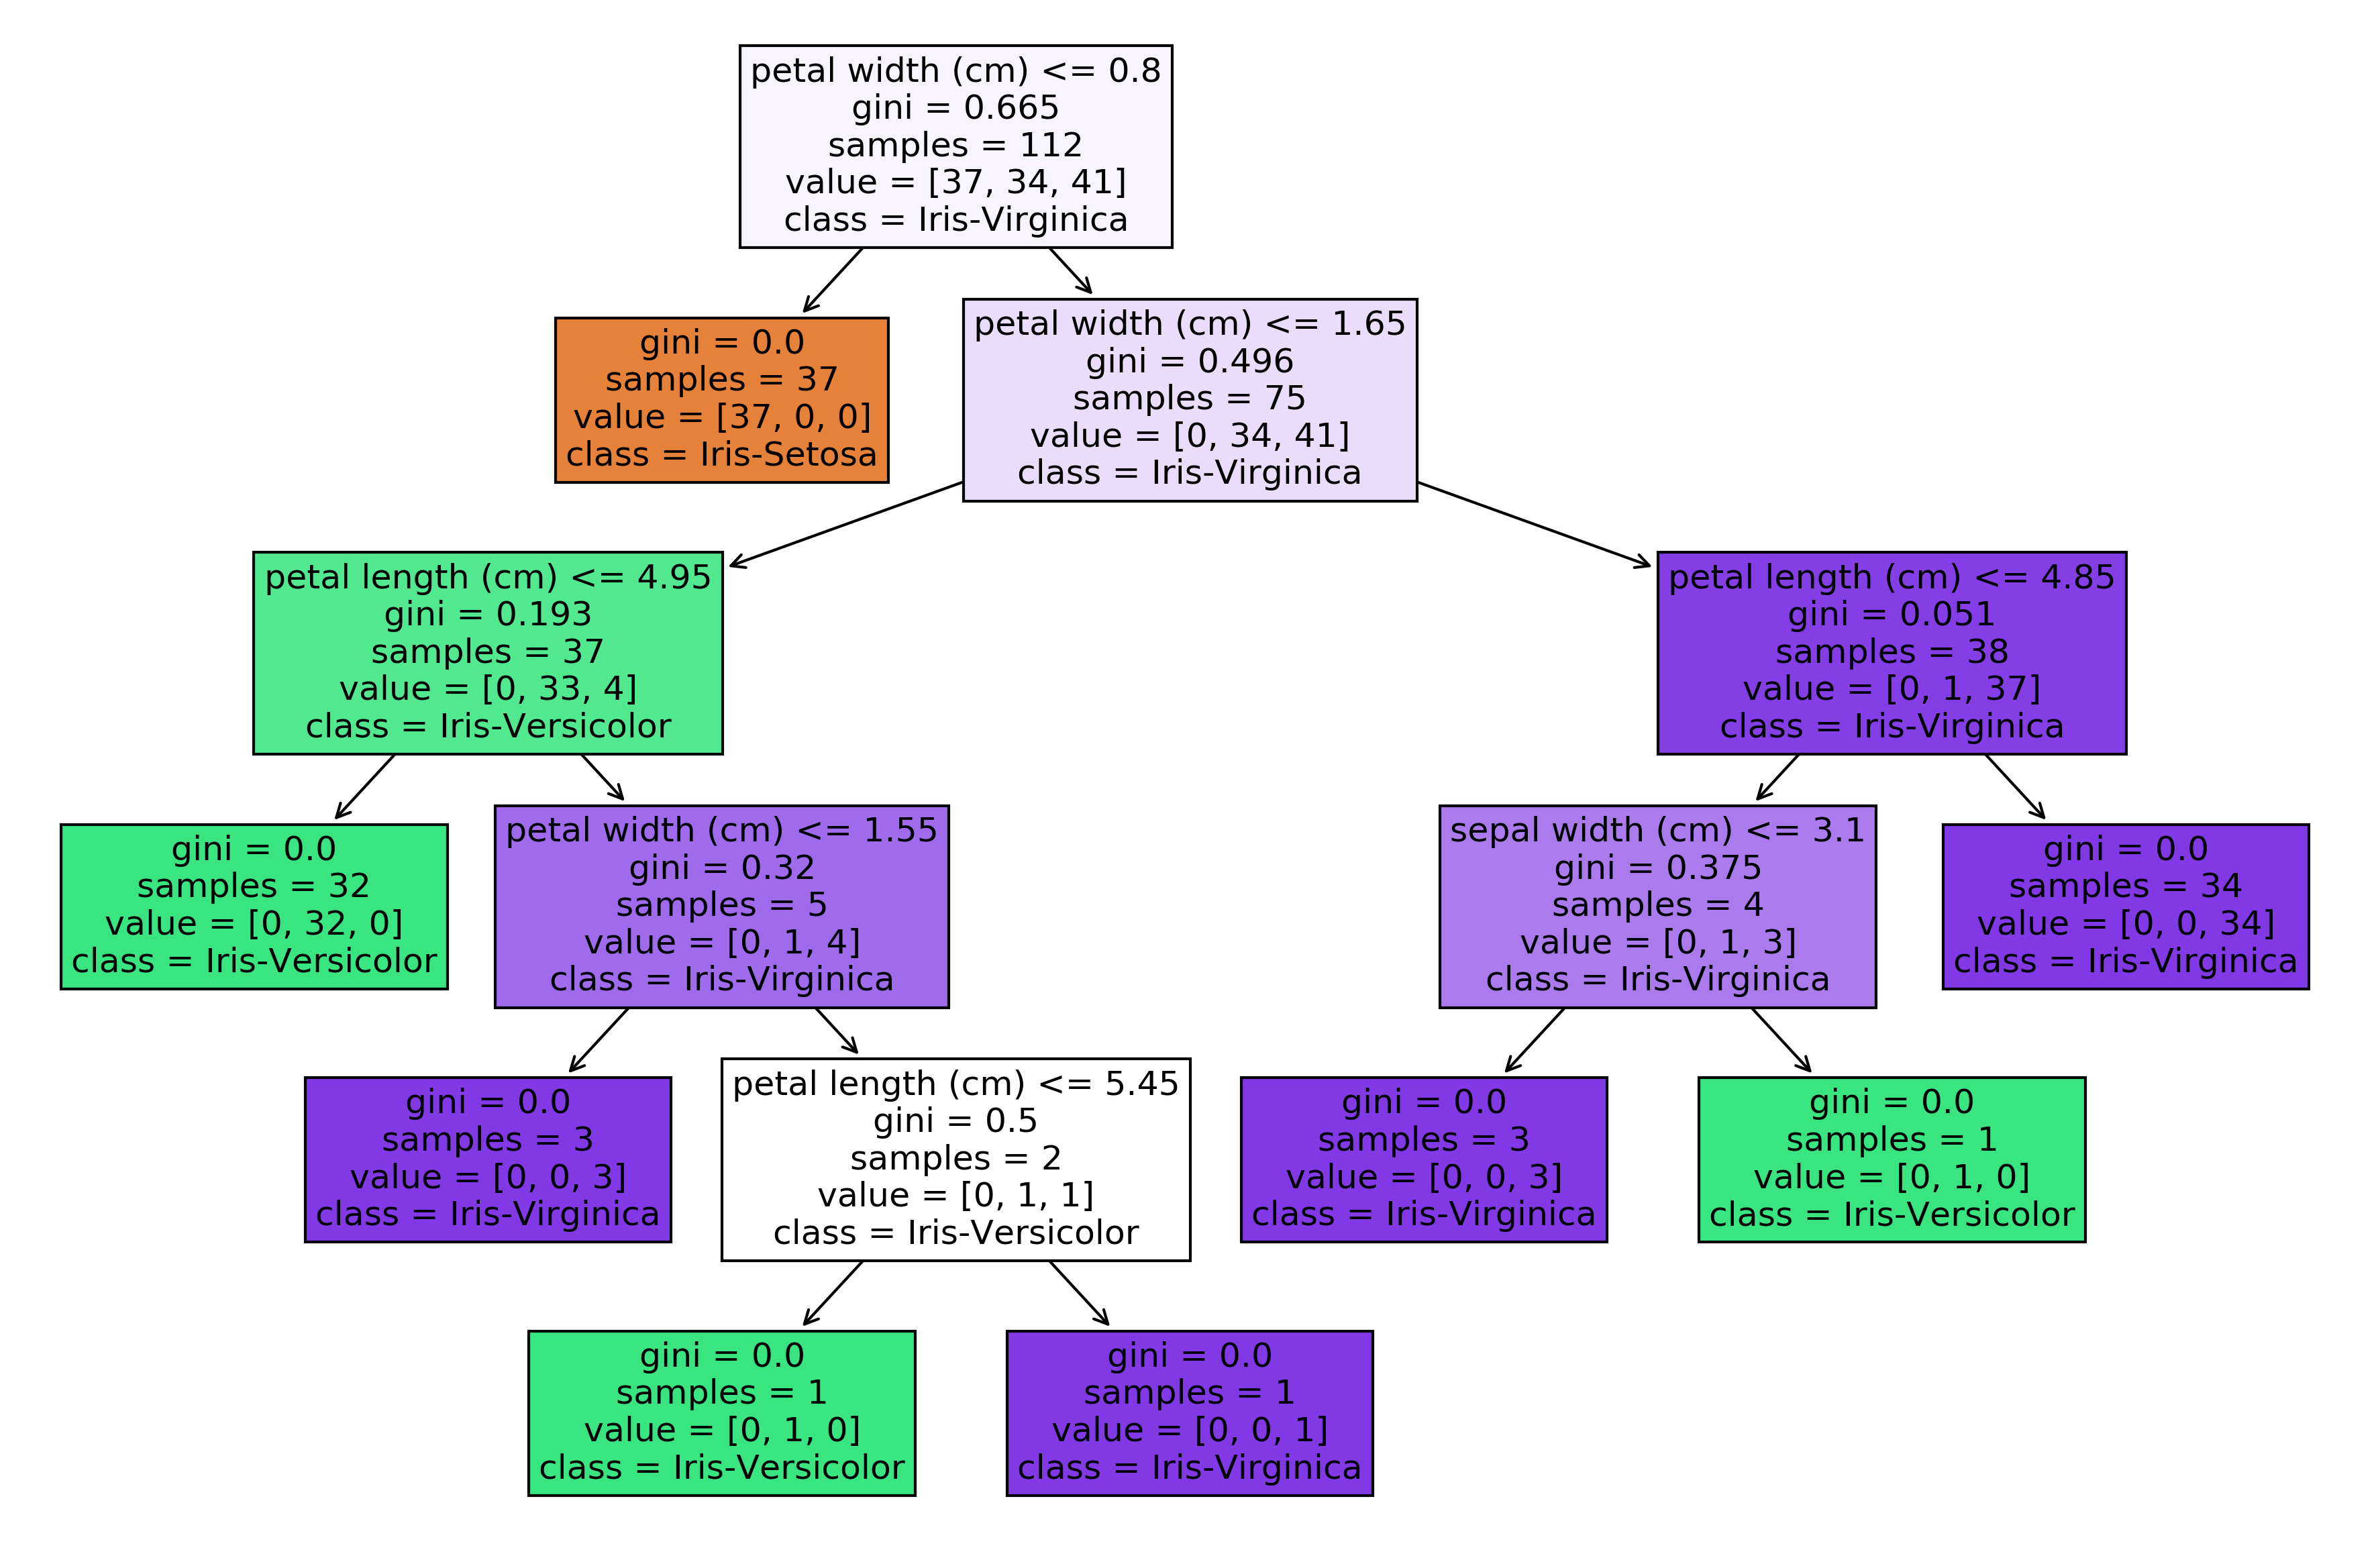

In [42]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(Dclassifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
